In this notebook we compute the differential cross section from the different approaches (nlo, div and css) for a particular choice of mass and longitudinal fraction. 

In [1]:
from dpp import setup as SETUP
from dpp import collider

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
mpl.rcParams['font.family'] = 'monospace'

In [6]:
setup = SETUP.Setup(400, 3)

In [9]:
Mtab = [1, 5, 10]
ztab = [0.1, 0.5, 0.9]
sample_size = 40
methods = ['css']
kTmin, kTmax = 0, 6
parametrization1 = 'BLNY'
parametrization2 = 'SY'

In [10]:
MIdf1, MIdf2 = None, None
idx = 0
for z in ztab:
    for M in Mtab:
        print(M, z)
        df1 = collider.transverse_differential_cross_section(setup, M, z, sample_size, methods,\
                                                    kTmin=kTmin, kTmax=kTmax, parametrization=parametrization1,\
                                                    scale='linear', pool_number=4)
        df2 = collider.transverse_differential_cross_section(setup, M, z, sample_size, methods,\
                                                    kTmin=kTmin, kTmax=kTmax, parametrization=parametrization2,\
                                                    scale='linear', pool_number=4)
        MIdf1_ = collider.to_MIdataframe(df1, idx)
        MIdf1 = collider.update_MIdataframe(MIdf1, MIdf1_)
        MIdf2_ = collider.to_MIdataframe(df2, idx)
        MIdf2 = collider.update_MIdataframe(MIdf2, MIdf2_)
        idx += 1

(1, 0.1)
(5, 0.1)
(10, 0.1)
(1, 0.5)
(5, 0.5)
(10, 0.5)
(1, 0.9)
(5, 0.9)
(10, 0.9)


**BLNY and SY schemes comparison**

In [12]:
def plot_index(n):
    
    i = n%3
    j = n/3
    
    return i, j

<IPython.core.display.Javascript object>


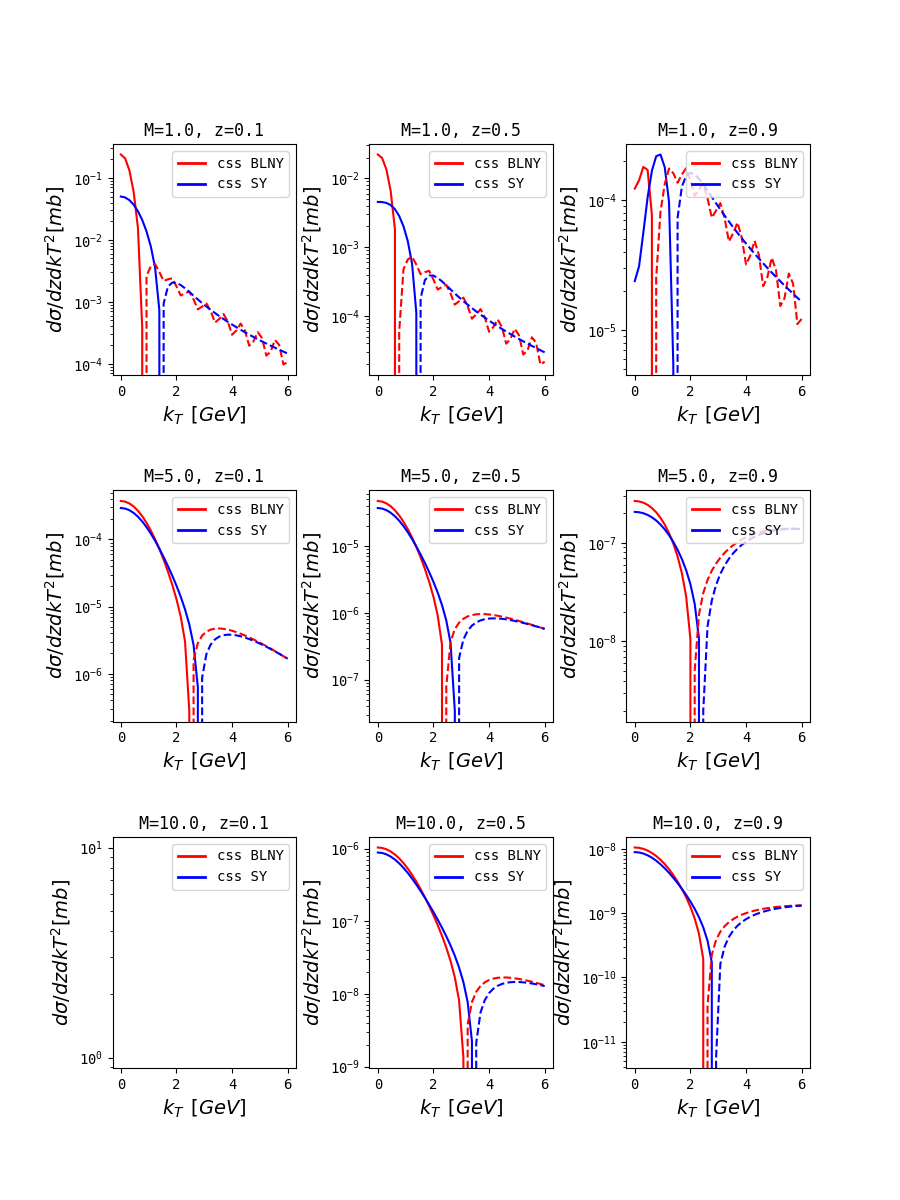

/home/jonas/.local/lib/python2.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


In [14]:
%matplotlib notebook

legends = [Line2D([0], [0], color='r', lw=2, label='css BLNY'),
           Line2D([0], [0], color='b', lw=2, label='css SY')]

fig, ax = plt.subplots(3, 3, figsize=(9, 12))

for n in range(9):
    i, j = plot_index(n)
    df1 = MIdf1[n]
    df2 = MIdf2[n]
    ax[i,j].plot(df1['kT'], df1['css'], color='r', Linestyle='-')
    ax[i,j].plot(df2['kT'], df2['css'], color='b', Linestyle='-')
    ax[i,j].plot(df1['kT'], -df1['css'], color='r', Linestyle='--')
    ax[i,j].plot(df2['kT'], -df2['css'], color='b', Linestyle='--')

    ax[i,j].set(xscale='linear', yscale='log')
    ax[i,j].set_xlabel('$k_T\:\:[GeV]$', fontsize=14)
    ax[i,j].set_ylabel('$d\sigma/dzdkT^2 [mb]$', fontsize=14)
    ax[i,j].set_title('M={}, z={}'.format(df1.at[0,'M'], df1.at[0,'z']))
    ax[i,j].legend(handles=legends, loc='upper right')
    
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

**BLNY parameters variation**

In [17]:
M = 5
z = 0.5
sample_size = 40
methods = ['css']
kTmin, kTmax = 0, 6
parametrizations = [['BLNY', (0.201, 0.184, -0.026)], ['BLNY', (0.212, 0.184, -0.026)],\
                   ['BLNY', (0.191, 0.184, -0.026)], ['BLNY', (0.201, 0.202, -0.026)],\
                   ['BLNY', (0.201, 0.168, -0.026)], ['BLNY', (0.201, 0.184, -0.033)],\
                   ['BLNY', (0.201, 0.184, -0.019)]]

In [18]:
MIdf = None
idx = 0
for parametrization in parametrizations:
    
    df = collider.transverse_differential_cross_section(setup, M, z, sample_size, methods,\
                                                kTmin=kTmin, kTmax=kTmax, parametrization=parametrization,\
                                                scale='linear', pool_number=4)
    
    MIdf_ = collider.to_MIdataframe(df, idx)
    MIdf = collider.update_MIdataframe(MIdf, MIdf_)
    idx += 1

<IPython.core.display.Javascript object>


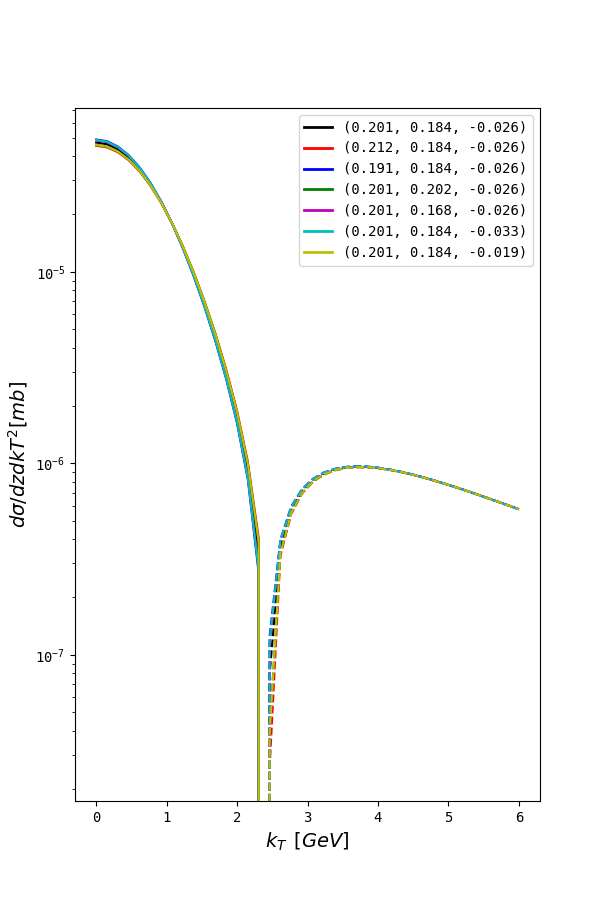

In [22]:
%matplotlib notebook

colors = ['k', 'r', 'b', 'g', 'm', 'c', 'y']
legends = [Line2D([0], [0], color=colors[i], lw=2, label=parametrizations[i][1])\
           for i in range(7)]

fig, ax = plt.subplots(figsize=(6, 9))

for n in range(7):
    df = MIdf[n]
    ax.plot(df['kT'], df['css'], color=colors[n], Linestyle='-')
    ax.plot(df['kT'], -df['css'], color=colors[n], Linestyle='--')


ax.set(xscale='linear', yscale='log')
ax.set_xlabel('$k_T\:\:[GeV]$', fontsize=14)
ax.set_ylabel('$d\sigma/dzdkT^2 [mb]$', fontsize=14)
ax.legend(handles=legends, loc='upper right')
    
plt.show()

**SY parameters variation**

In [23]:
M = 5
z = 0.5
sample_size = 40
methods = ['css']
kTmin, kTmax = 0, 6
parametrizations = [['SY', (0.212, 0.84, 0.)], ['SY', (0.218, 0.84, 0.)],\
                   ['SY', (0.205, 0.84, 0.)], ['SY', (0.212, 0.88, 0.)],\
                   ['SY', (0.212, 0.805, 0.)]]

In [24]:
MIdf = None
idx = 0
for parametrization in parametrizations:
    
    df = collider.transverse_differential_cross_section(setup, M, z, sample_size, methods,\
                                                kTmin=kTmin, kTmax=kTmax, parametrization=parametrization,\
                                                scale='linear', pool_number=4)
    
    MIdf_ = collider.to_MIdataframe(df, idx)
    MIdf = collider.update_MIdataframe(MIdf, MIdf_)
    idx += 1

<IPython.core.display.Javascript object>


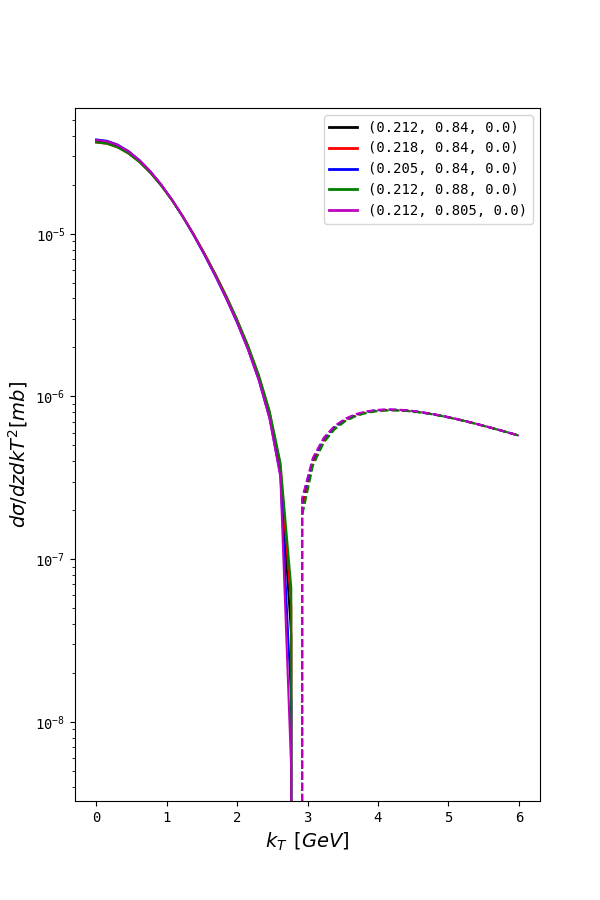

In [28]:
%matplotlib notebook

colors = ['k', 'r', 'b', 'g', 'm']
legends = [Line2D([0], [0], color=colors[i], lw=2, label=parametrizations[i][1])\
           for i in range(5)]

fig, ax = plt.subplots(figsize=(6, 9))

for n in range(5):
    df = MIdf[n]
    ax.plot(df['kT'], df['css'], color=colors[n], Linestyle='-')
    ax.plot(df['kT'], -df['css'], color=colors[n], Linestyle='--')


ax.set(xscale='linear', yscale='log')
ax.set_xlabel('$k_T\:\:[GeV]$', fontsize=14)
ax.set_ylabel('$d\sigma/dzdkT^2 [mb]$', fontsize=14)
ax.legend(handles=legends, loc='upper right')
    
plt.show()